In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format',lambda x:'%.4f'%x)

df_train_x = pd.read_csv('../data/train_values_6tLXv3T.csv', encoding='utf8')
df_test_x = pd.read_csv('../data/test_values_K7FqC54.csv', encoding='utf8')
df_train_y = pd.read_csv('../data/train_labels.csv', encoding='utf8')
df_test_y = pd.read_csv('../data/submission_format_klDJt5C.csv', encoding='utf8')

# Data Describe

In [3]:
def data_describe(df):

    describe = pd.DataFrame()
    duplicate_num(df, describe)
    is_null_number(df, describe)
    describe['null_rate'] = describe['null_number']/len(df)

    return describe
    
    
def duplicate_num(df, describe):
    dup_num = df.apply(lambda x:x.unique().shape[0], axis=0)
    describe['duplicate'] = dup_num
    
    
def is_null_number(df, describe):
    describe['is_null'] = df.isnull().any()
    describe['null_number'] = df.isnull().sum()


--- 
# DF Info

## 1. training data

###          (1) df_train_x

In [4]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 46 columns):
row_id                                               1401 non-null int64
country_code                                         1401 non-null object
year                                                 1401 non-null int64
agricultural_land_area                               1385 non-null float64
percentage_of_arable_land_equipped_for_irrigation    1153 non-null float64
cereal_yield                                         1337 non-null float64
droughts_floods_extreme_temps                        75 non-null float64
forest_area                                          1385 non-null float64
total_land_area                                      1401 non-null float64
fertility_rate                                       1387 non-null float64
life_expectancy                                      1386 non-null float64
rural_population                                     1401 non-null float64


In [5]:
data_describe1 = data_describe(df_train_x)  
# data_describe1
data_describe1.to_csv('train_x_describe.csv', index=True, encoding='utf8')

In [6]:
# columns with null number
data_describe1[data_describe1['is_null']==True]

,duplicate,is_null,null_number,null_rate
agricultural_land_area,1386,True,16,0.0114
percentage_of_arable_land_equipped_for_irrigation,1153,True,248,0.1770
cereal_yield,1338,True,64,0.0457
droughts_floods_extreme_temps,76,True,1326,0.9465
forest_area,1386,True,16,0.0114
fertility_rate,1388,True,14,0.0100
life_expectancy,1387,True,15,0.0107
population_growth,1400,True,1,0.0007
avg_value_of_food_production,1235,True,167,0.1192
cereal_import_dependency_ratio,1085,True,317,0.2263


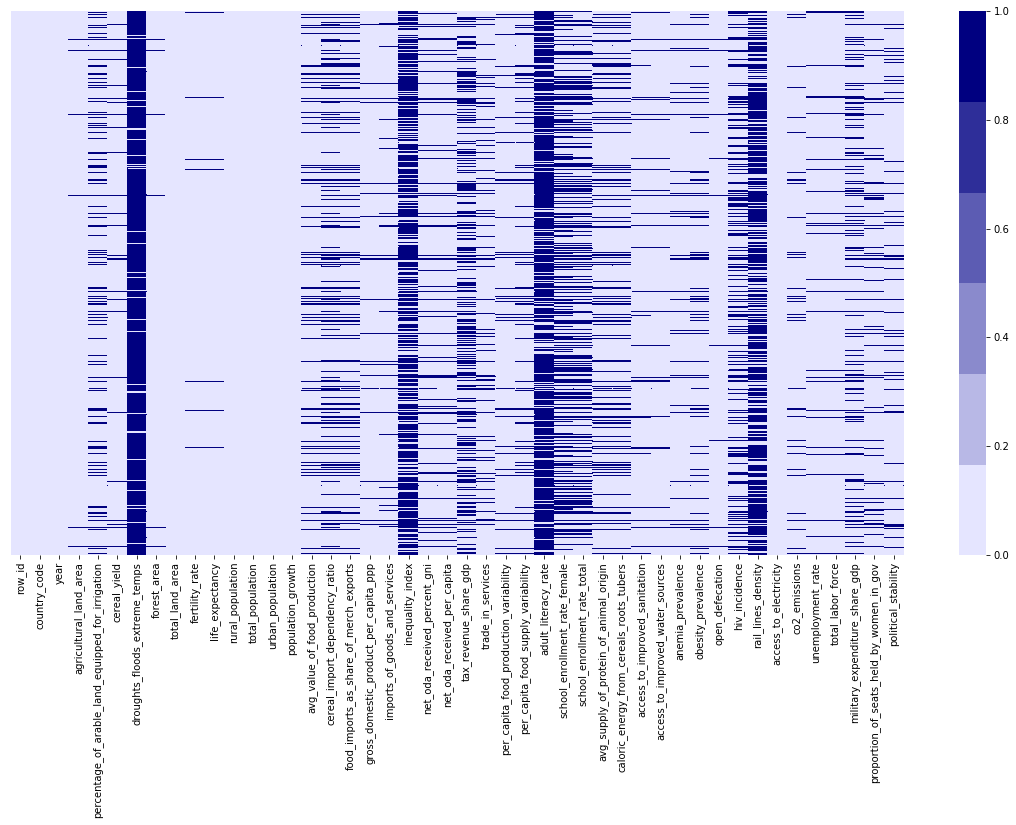

In [7]:
# df_train_x null data  
plt.figure(figsize=(20,10))
cmap=sns.light_palette("navy", reverse=False)
sns.heatmap(df_train_x.isnull().astype(np.int8),yticklabels=False,cmap=cmap)

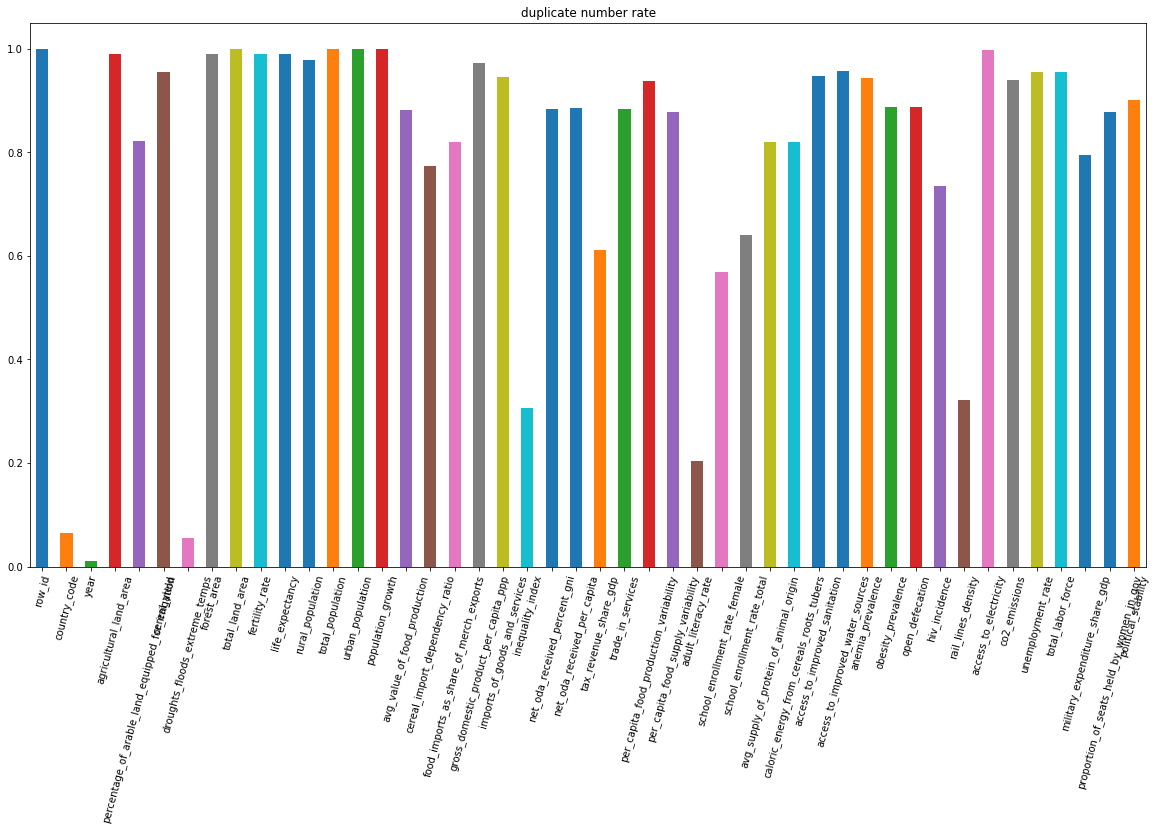

In [8]:
# duplicate number rate
dup_num = df_train_x.apply(lambda x:x.unique().shape[0], axis=0)
plt.figure(figsize=(20,10))
(dup_num/df_train_x.shape[0]).plot(kind='bar', rot=75, title='duplicate number rate')

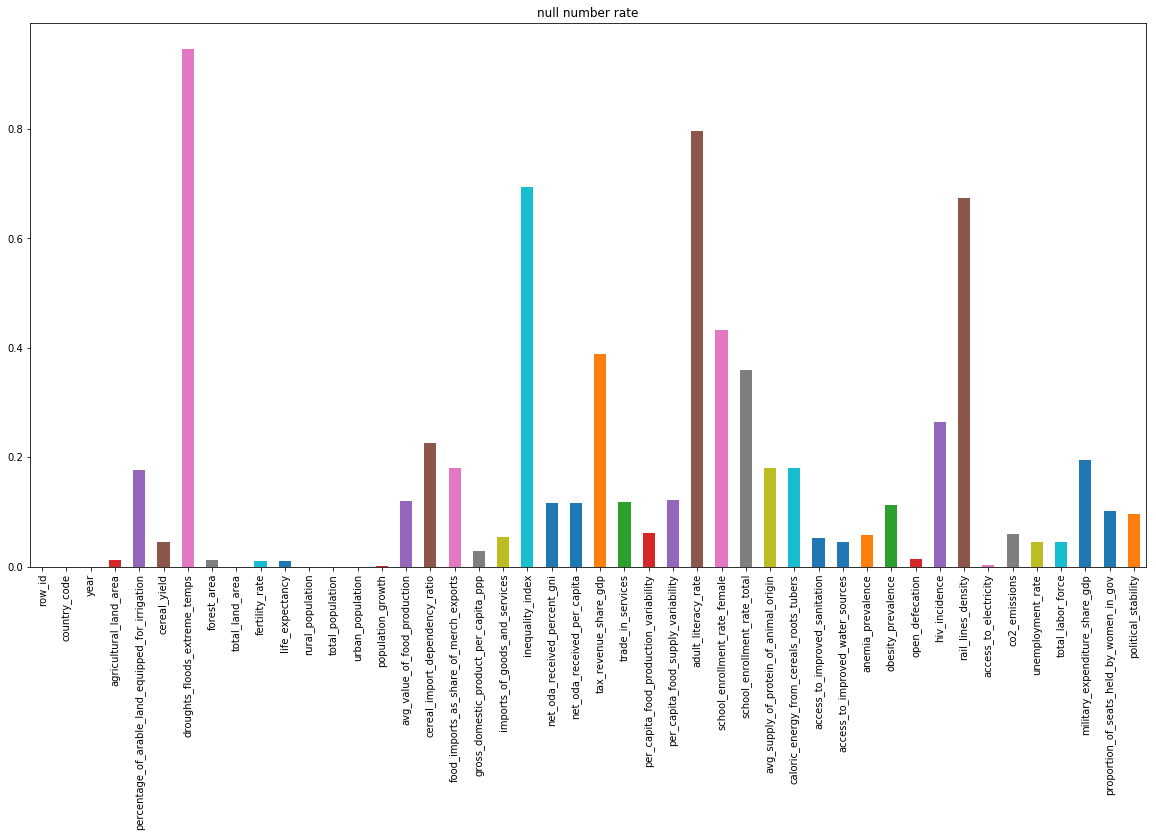

In [9]:
# null number rate

plt.figure(figsize=(20,10))
data_describe1['null_rate'].plot(kind='bar', title='null number rate')

###          (2) df_train_y

In [10]:
df_train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 2 columns):
row_id                            1401 non-null int64
prevalence_of_undernourishment    1401 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.0 KB


In [11]:
data_describe(df_train_y)

,duplicate,is_null,null_number,null_rate
row_id,1401,False,0,0.0000
prevalence_of_undernourishment,1401,False,0,0.0000


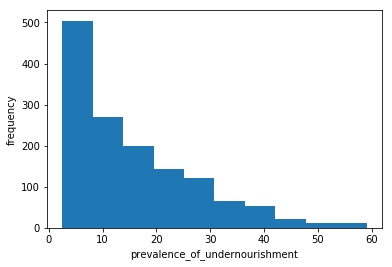

In [12]:
plt.hist(df_train_y['prevalence_of_undernourishment'], bins=10)
plt.xlabel('prevalence_of_undernourishment')
plt.ylabel('frequency')
plt.show()

## 2. test data

###          (1) df_test_x

In [13]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 46 columns):
row_id                                               616 non-null int64
country_code                                         616 non-null object
year                                                 616 non-null int64
agricultural_land_area                               616 non-null float64
percentage_of_arable_land_equipped_for_irrigation    512 non-null float64
cereal_yield                                         584 non-null float64
droughts_floods_extreme_temps                        34 non-null float64
forest_area                                          616 non-null float64
total_land_area                                      616 non-null float64
fertility_rate                                       616 non-null float64
life_expectancy                                      616 non-null float64
rural_population                                     616 non-null float64
total_populat

In [14]:
data_describe2 = data_describe(df_test_x)
# data_describe2
data_describe2.to_csv('test_x_describe.csv', index=True, encoding='utf8')

In [15]:
# columns with null number
data_describe2[data_describe2['is_null']==True]

,duplicate,is_null,null_number,null_rate
percentage_of_arable_land_equipped_for_irrigation,513,True,104,0.1688
cereal_yield,585,True,32,0.0519
droughts_floods_extreme_temps,35,True,582,0.9448
avg_value_of_food_production,541,True,76,0.1234
cereal_import_dependency_ratio,477,True,140,0.2273
food_imports_as_share_of_merch_exports,503,True,114,0.1851
imports_of_goods_and_services,560,True,57,0.0925
inequality_index,140,True,477,0.7744
net_oda_received_percent_gni,562,True,55,0.0893
net_oda_received_per_capita,580,True,37,0.0601


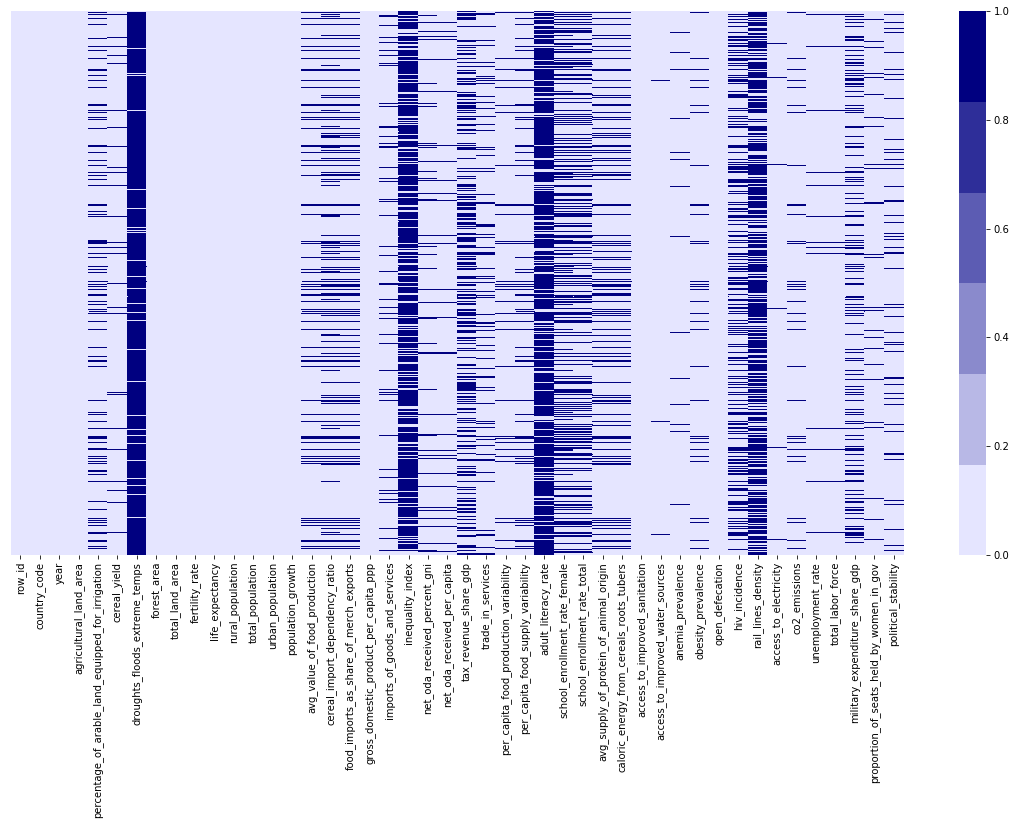

In [16]:
# df_test_x null data  
plt.figure(figsize=(20,10))
cmap=sns.light_palette("navy", reverse=False)
sns.heatmap(df_test_x.isnull().astype(np.int8),yticklabels=False,cmap=cmap)

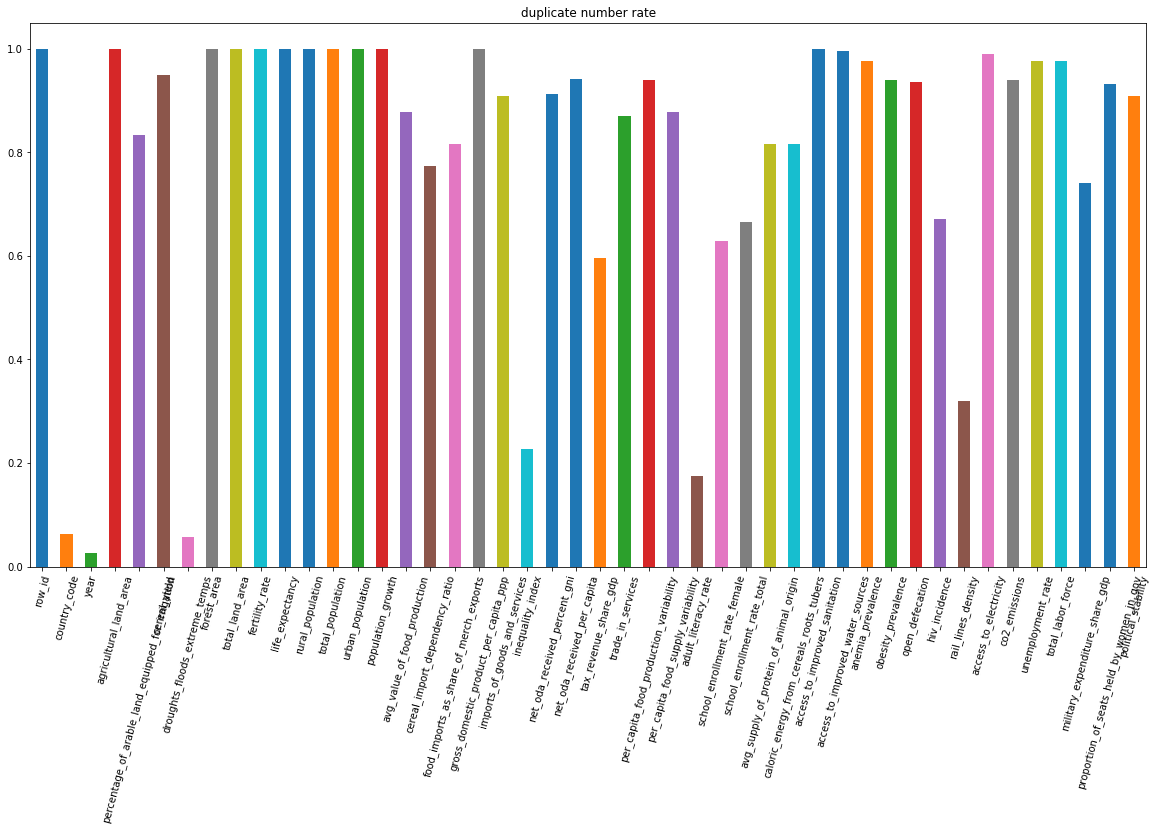

In [17]:
# duplicate number rate
dup_num = df_test_x.apply(lambda x:x.unique().shape[0], axis=0)
plt.figure(figsize=(20,10))
(dup_num/df_test_x.shape[0]).plot(kind='bar', rot=75, title='duplicate number rate')

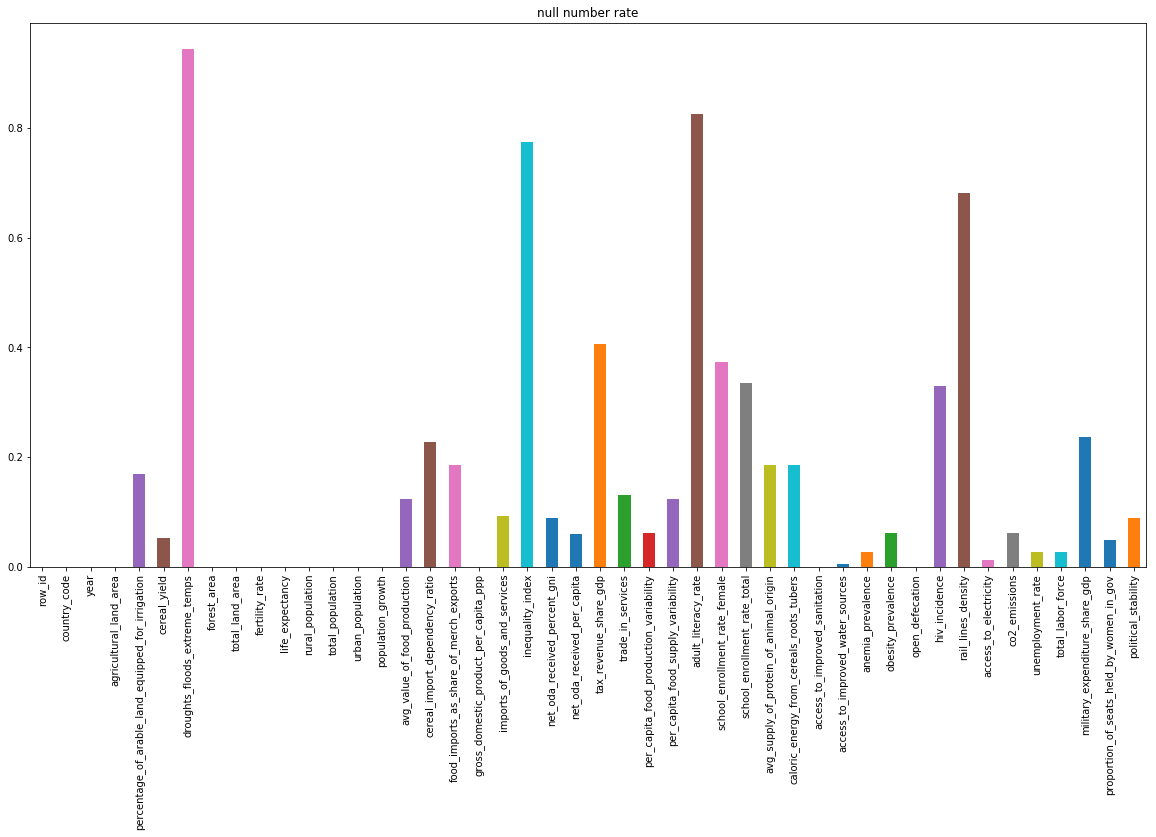

In [18]:
# null number rate

plt.figure(figsize=(20,10))
data_describe2['null_rate'].plot(kind='bar', title='null number rate')

###          (2) df_test_y

In [19]:
df_test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
row_id                            616 non-null int64
prevalence_of_undernourishment    616 non-null float64
dtypes: float64(1), int64(1)
memory usage: 9.7 KB


In [20]:
data_describe(df_test_y)  

,duplicate,is_null,null_number,null_rate
row_id,616,False,0,0.0000
prevalence_of_undernourishment,1,False,0,0.0000


---

# Summary

In [21]:
data_describe1.loc['year']

duplicate         16
is_null        False
null_number        0
null_rate     0.0000
Name: year, dtype: object